#### 

### <span style='color:#40E0D0'> Objetivo:

Realização de Análise Exploratória de Dados a fim de conhecer os dados de forma geral, suas distribuições, medidas estatísticas, correlações e evoluções a fim de gerar insights. <br>

Fase, de certa forma, mais focalizada nas perguntas de negócio como fase 1 do CRISP-DM, mas que também pode ser útil como um objeto de busca de informações sobre os dados.

<hr>

### <span style='color:#40E0D0'> Foco:

- **Quais as características dos candidatos** tem alguma **relação** **com a nota** pode trazer muito conhecimento extraído dos dados

- **sexo influencia na nota? Renda, raça, escolaridade dos pais influencia?**

NU_NOTA_CN                
NU_NOTA_CH                
NU_NOTA_LC                
NU_NOTA_MT<br>
NU_NOTA_REDACAO
<hr>

### <span style='color:#40E0D0'> 1° vista dados:

In [2]:
# Importando bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Configurando pandas para expor todas as colunas e linhas.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configurando para não mostrar notação científica.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
# Converter csv em parquet. ~ economizaremos espaço ~
df_enem_csv = pd.read_csv('./microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv', encoding='latin1', sep=';')
df_enem_csv.to_parquet('./microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.parquet')

In [5]:
df_enem = pd.read_parquet('./microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.parquet')

print(f'Linhas:  {df_enem.shape[0]}')
print(f'Colunas: {df_enem.shape[1]}')
    

Linhas:  3476105
Colunas: 76


In [6]:
# 1° Vista dos dados
df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.00,1056.00,1066.00,1078.00,421.10,546.00,498.80,565.30,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.00,140.00,200.00,120.00,140.00,160.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.00,1058.00,1067.00,1077.00,490.70,388.60,357.80,416.00,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.00,120.00,40.00,40.00,100.00,20.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


<span style='color:#40E0D0'> Conhecendo os dados:

In [7]:
# São todos únicos? Há dados repetidos?
print(f'Temos: {df_enem.duplicated().sum()} inscrições repetidas')

Temos: 0 inscrições repetidas


In [8]:
# Podemos conferir dessa outra forma: Caso a quantidade de inscrições únicas seja igual as linhas do df_enem.shape então não temos inscrições repetidas
print(len(df_enem['NU_INSCRICAO'].unique()))
print(f'Linhas:  {df_enem.shape[0]}')

3476105
Linhas:  3476105


In [9]:
# Tipos das colunas
df_enem.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

<span style='color:red'> Atenção:

Em \microdados_enem_2022\DICIONÁRIO\Dicionario_dados encotraremos a explição de cada coluna e seus valores.

### <span style='color:#40E0D0'> Limpando:

- Temos como **foco as notas** então limparemos dados em torno dela.

1. Separando colunas com as respostas. Não analisaremos em tal nível.

In [10]:
# Destinando colunas com repostas à variável coluna_questoes. Não servirá para nosso foco.
coluna_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]

coluna_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

2. Separando colunas de códigos.

In [11]:
# Destinando colunas com códigos à variável coluna_codigos. Não servirá para nosso foco.
coluna_codigos = [codigo for codigo in df_enem.columns if codigo.startswith('CO_')]

coluna_codigos

['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

3. Separando os Municípios. Não faremos uma análise por municípios.

In [12]:
coluna_municipio = [municipio for municipio in df_enem.columns if 'MUNICIPIO' in municipio]

coluna_municipio

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

4. Removendo. (Não utilizaremos Inscrição ou Ano, também removeremos.)

In [13]:
# Juntando em um lista, todas as listas de colunas que separamos acima e vamos remover.
colunas_remover = coluna_questoes + coluna_municipio + coluna_codigos + ['NU_INSCRICAO'] + ['NU_ANO']

colunas_remover

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_INSCRICAO',
 'NU_ANO']

In [14]:
# Removendo as colunas desejadas.
df_enem.drop(colunas_remover, axis= 'columns', inplace= True)

# Visualizando a modificação e o shape do df
display(df_enem.head())
df_enem.shape

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,140.00,200.00,120.00,140.00,160.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,120.00,40.00,40.00,100.00,20.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


(3476105, 56)

<span style='color:red'> Atenção:

Em \microdados_enem_2022\DICIONÁRIO\Dicionario_dados encotraremos a explição de cada coluna e seus valores.

### <span style='color:#40E0D0'> Estatística Descritiva:
Conhecer as medidas estatísticas como de frequência, tendência central, dispersão, separatrizes trará um conhecimento maior por cima dos dados.

In [15]:
df_enem.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3476105.00,3476105.00,3476105.00,3476105.00,3476105.00,3476105.00,3476105.00,1262744.00,3476105.00,951944.00,951944.00,951944.00,3476105.00,3476105.00,3476105.00,3476105.00,2355395.00,2493442.00,2493442.00,2355395.00,3476105.00,2493442.00,2493442.00,2493442.00,2493442.00,2493442.00,2493442.00,2493442.00,3476105.00
mean,4.86,1.04,2.04,1.03,1.68,2.18,1.44,1.01,0.15,2.44,1.04,1.02,0.68,0.72,0.72,0.68,495.93,526.95,517.44,542.50,0.45,1.19,119.39,140.96,114.87,129.44,113.82,618.48,3.75
std,3.69,0.39,1.02,0.21,0.73,4.06,0.61,0.08,0.35,0.91,0.18,0.20,0.47,0.45,0.45,0.47,72.01,81.48,77.55,116.02,0.50,0.88,37.01,53.54,41.03,42.68,59.82,212.21,1.38
min,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,440.50,477.00,468.40,449.00,0.00,1.00,100.00,120.00,100.00,120.00,80.00,520.00,3.00
50%,3.00,1.00,2.00,1.00,2.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,485.60,529.90,525.50,530.80,0.00,1.00,120.00,140.00,120.00,120.00,120.00,620.00,4.00
75%,6.00,1.00,3.00,1.00,2.00,2.00,2.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,543.30,581.90,573.20,622.40,1.00,1.00,140.00,200.00,140.00,160.00,160.00,760.00,4.00
max,20.00,4.00,5.00,4.00,4.00,16.00,3.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,875.30,839.20,801.00,985.70,1.00,9.00,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


Podemos entender certos dados somando o conhecimento adquirido no Dicionário de dados através dos métodos estatísticos.


In [16]:
# Checando todas as colunas com notas
colunas_notas = [ colunas for colunas in df_enem.columns if 'NOTA' in colunas]

colunas_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

Removendo notas de competências da Redação. Ficaremos apenas com a nota principal da redação.

In [17]:
# Selecionando as colunas referentes a nota de competência de redação
nota_competencias_redacao = [ coluna for coluna in df_enem.columns if 'COMP' in coluna]

display(nota_competencias_redacao)

# Removendo as notas de competencia da redação
df_enem = df_enem.drop(nota_competencias_redacao, axis= 'columns')

display(df_enem.head())

['NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [18]:
# Verificando as notas que restaram estão condizentes com nosso foco.
colunas_notas = [ colunas for colunas in df_enem.columns if 'NOTA' in colunas]

colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

<span style='color:#40E0D0'> Analisando as notas:

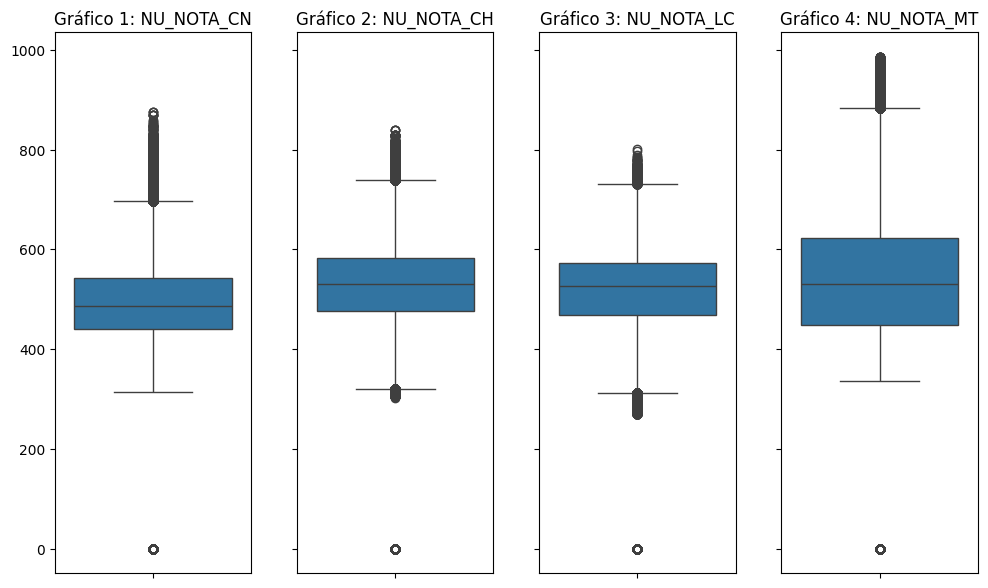

In [19]:
# 4 gráficos, pois temos 4 primeiras notas.
fig, axes = plt.subplots(1, 4, sharey= True,figsize=(10,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i] # Iremos pegar a posição de cada nota
    sns.boxplot(data= df_enem, y= coluna_1, ax= axes[i])
    axes[i].set_title(f'Gráfico {i+1}: {coluna_1}')
    axes[i].set_ylabel('')

plt.show()


Distribuições das notas

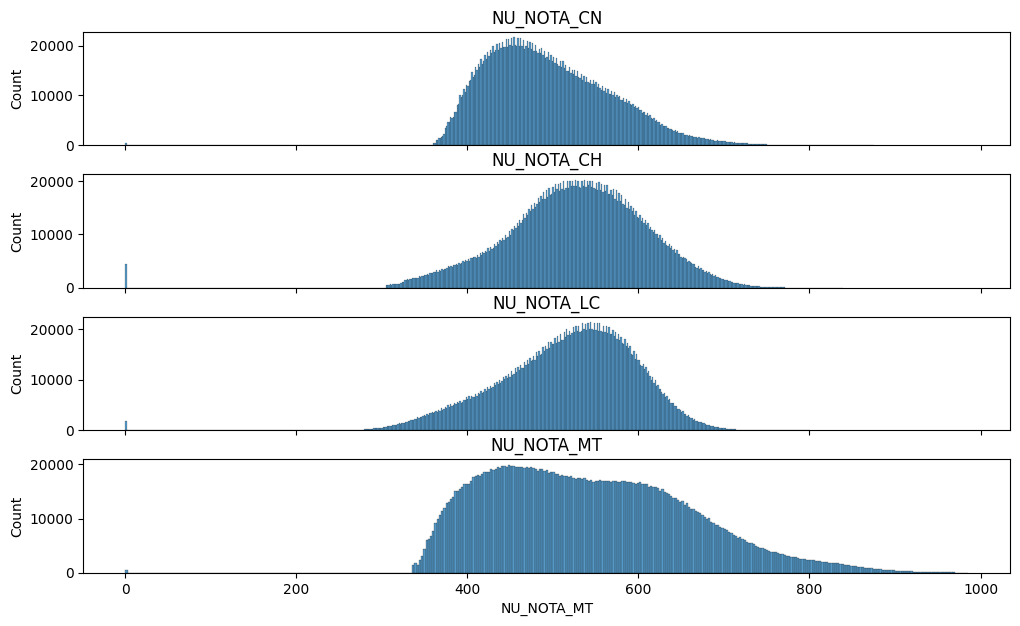

In [20]:
fig, axes = plt.subplots(4, 1, sharex= True, figsize=(10, 6))
plt.tight_layout()

for i in range(4):
    sns.histplot(data= df_enem, x= colunas_notas[i], ax=axes[i]).set_title(colunas_notas[i])
    
plt.show()

Nota redação

<function matplotlib.pyplot.show(close=None, block=None)>

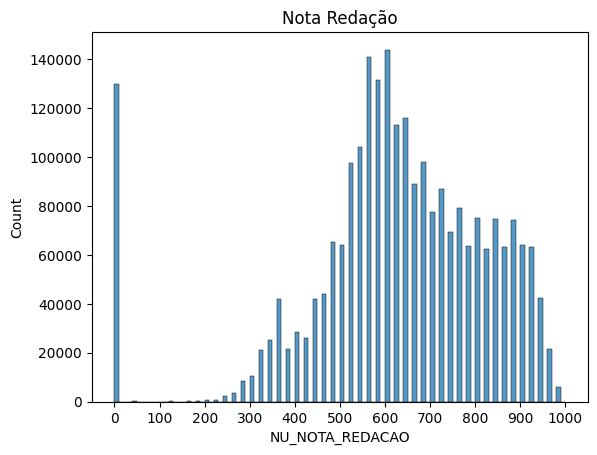

In [21]:
sns.histplot(data= df_enem, x= df_enem[colunas_notas[-1]], binwidth= 10).set_title('Nota Redação')
plt.xticks([val for val in range(0, 1001, 100)])

plt.show

Text(0.5, 1.0, 'Density Nota Redação')

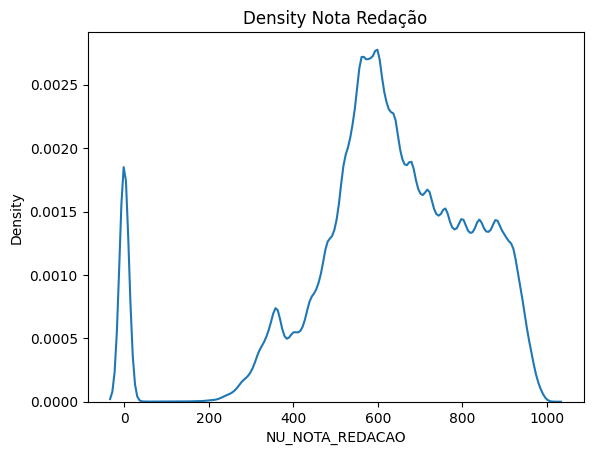

In [22]:
sns.kdeplot(data= df_enem[colunas_notas[-1]]).set_title('Density Nota Redação')

<span style='color:#40E0D0'> Analisando outras dados:

In [23]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


faixas etárias:

In [24]:
# Olhando faixas etárias
df_enem['TP_FAIXA_ETARIA'].value_counts().sort_index()

TP_FAIXA_ETARIA
1     303605
2     711278
3     805862
4     408115
5     247679
6     165982
7     123260
8      94849
9      73338
10     61564
11    189700
12    103634
13     74162
14     49735
15     30066
16     17688
17      9688
18      3817
19      1505
20       578
Name: count, dtype: int64

A organização feita pelo Enem não foi pelas idades, mas por faixas etárias. Fica nítido, pois não há lógica crianças menores de 14 anos prestarem a prova uma vez que sequer estão próximas de chegarem ao ensino médio. Com isso, temos a seguinte organização:

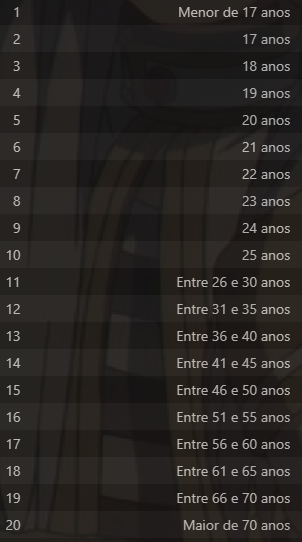

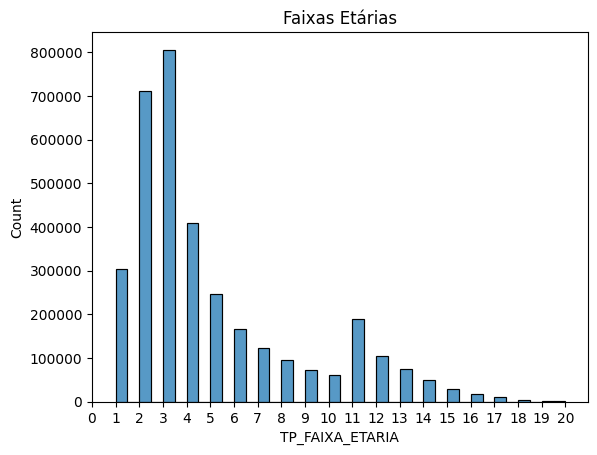

In [25]:
# Plotando as faixas etárias

sns.histplot(data= df_enem['TP_FAIXA_ETARIA'], binwidth= 0.5).set_title('Faixas Etárias')
plt.xticks([val for val in range(0, 21, 1)])

plt.show()

Sexos:

In [26]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [27]:
# Porcentagem dos valores de Homens e Mulheres
df_enem['TP_SEXO'].value_counts(normalize= True) * 100

TP_SEXO
F   61.00
M   39.00
Name: proportion, dtype: float64

In [28]:
df_enem['TP_SEXO'].value_counts()

TP_SEXO
F    2120519
M    1355586
Name: count, dtype: int64

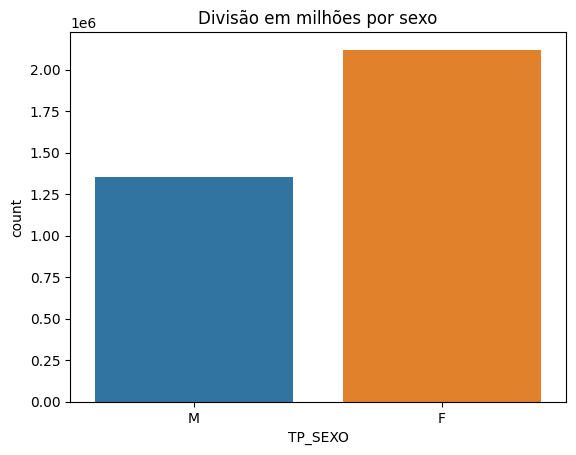

In [29]:
# Separação em Milhões.
sns.countplot(data= df_enem, x= 'TP_SEXO', hue= 'TP_SEXO').set_title('Divisão em milhões por sexo')

plt.show()

Estado Civil:

In [30]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [31]:
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_values(ascending= False)

TP_ESTADO_CIVIL
1    3127949
2     165719
0     128493
3      50380
4       3564
Name: count, dtype: int64

Explicação dados Estado Civil

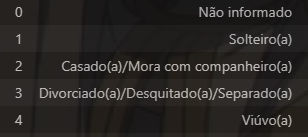

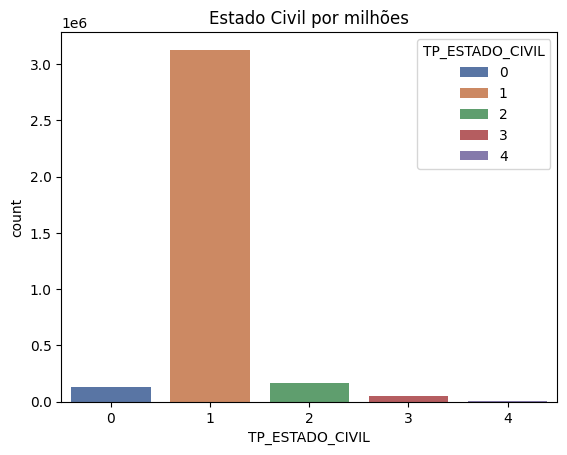

In [32]:
# Visualização dados Estado Civil
sns.countplot(data= df_enem, x= 'TP_ESTADO_CIVIL', hue= 'TP_ESTADO_CIVIL', palette= 'deep').set_title('Estado Civil por milhões')

plt.show()

Cor e Raça

In [33]:
df_enem['TP_COR_RACA'].value_counts()

TP_COR_RACA
3    1488844
1    1428081
2     408422
4      66051
0      64867
5      19840
Name: count, dtype: int64

Explicação cor e raça:

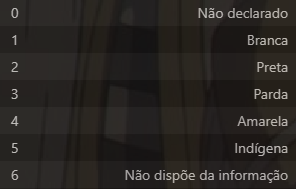


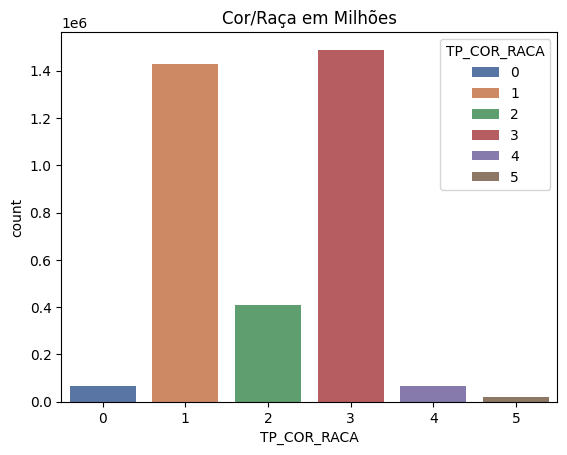

In [34]:
# Visualização dos dados sobre raça cor
sns.countplot(data= df_enem, x= 'TP_COR_RACA', hue='TP_COR_RACA', palette= 'deep').set_title('Cor/Raça em Milhões')

plt.show()

Grande prevalência de pessoas autodeclaradas pardas, seguidas por brancas. É sabido que é uma opção autodeclarada, ou seja, segue critérios pessoas do que o usuário se encaixa.

Estados UF ~Sigla de Unidade da Federção da Escola~

In [35]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [36]:
ufs  = df_enem['SG_UF_ESC'].value_counts()
ufs

SG_UF_ESC
SP    184295
CE    102972
MG     68869
RJ     68435
PR     50307
GO     47563
BA     44483
PE     43562
RS     41842
PA     34897
SC     31316
AM     27737
MA     27679
PB     21483
ES     19998
DF     19348
MT     16877
RN     16701
PI     16296
AL     15685
MS     13105
SE     10802
RO      9687
TO      7626
AC      4291
AP      3869
RR      2219
Name: count, dtype: int64

In [37]:
# Criando df de ufs
df_ufs = pd.DataFrame({'UF' : ufs.index, 'Candidatos': ufs.values})
df_ufs

,UF,Candidatos
0,SP,184295
1,CE,102972
2,MG,68869
3,RJ,68435
4,PR,50307
5,GO,47563
6,BA,44483
7,PE,43562
8,RS,41842
9,PA,34897


In [38]:
import plotly.express as px

In [39]:
# Criando TreeMap para visualização e comparação de candidatos por UF
fig = px.treemap(data_frame= df_ufs, 
           path= ['UF'], 
           values= 'Candidatos')

fig.update_traces(root_color= 'lightgrey')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

### <span style='color:#40E0D0'> Análise socioeconômico:

O enem foi capaz de trazer as questões socieconomicas em espaços Q00X. Apartir do valor de X sendo alterado entraremos em outro medidor social ou econômico. Também iremos visualizar dados desta sessão.

#### <span style='color:#40E0D0'>  Reconhecendo pais que apresentam nível superior

#### <span style='color:red'> Q001 </span>- Até que série seu pai ou o homem responsável:

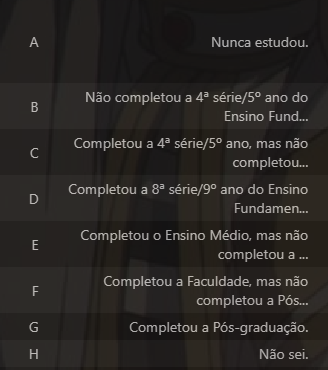


In [40]:
# Vendo a quantidade por escolaridade
df_enem['Q001'].value_counts()

Q001
E    1002676
B     601131
C     456924
D     388901
H     333549
F     316880
G     236316
A     139728
Name: count, dtype: int64

In [41]:
# Pais com nível superior
df_enem['pais_nivel_sup'] = df_enem['Q001'].isin(['F', 'G'])
df_enem.pais_nivel_sup.value_counts(normalize= True) * 100

pais_nivel_sup
False   84.09
True    15.91
Name: proportion, dtype: float64

In [42]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pais_nivel_sup
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False


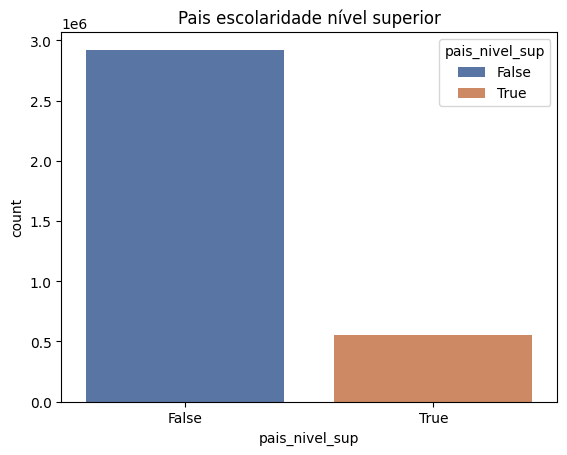

In [43]:
sns.countplot(data= df_enem, x= 'pais_nivel_sup', hue='pais_nivel_sup', palette= 'deep').set_title('Pais escolaridade nível superior')

plt.show()

#### <span style='color:red'> Q002 </span>- Até que série sua mãe ou o mulher responsável:

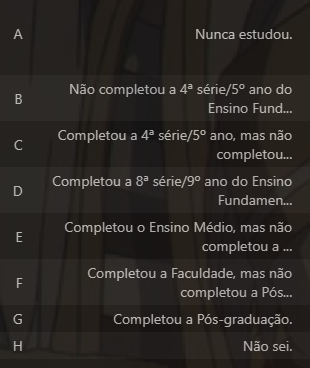

In [44]:
df_enem['Q002'].value_counts()

Q002
E    1217025
B     431585
F     424771
D     415361
G     402007
C     386363
H     109953
A      89040
Name: count, dtype: int64

In [45]:
df_enem['maes_nivel_sup'] = df_enem['Q002'].isin(['F', 'G'])
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pais_nivel_sup,maes_nivel_sup
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False,False
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False,False
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False,True
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False,False
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False,False


In [46]:
# Maes nível superior
df_enem['maes_nivel_sup'].value_counts(normalize= True) * 100

maes_nivel_sup
False   76.22
True    23.78
Name: proportion, dtype: float64

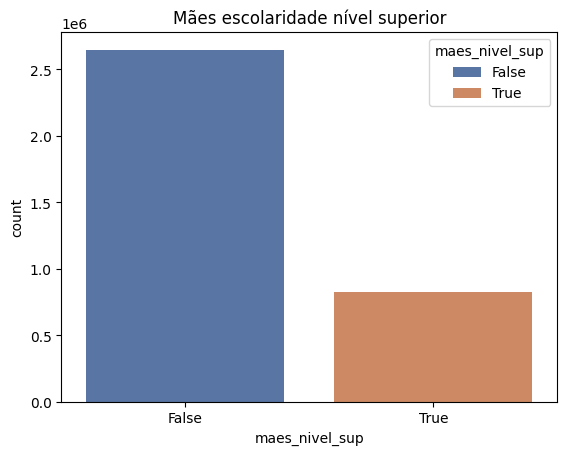

In [47]:
sns.countplot(data= df_enem, x= 'maes_nivel_sup', hue='maes_nivel_sup', palette= 'deep').set_title('Mães escolaridade nível superior')

plt.show()

#### <span style='color:red'> Q006 </span>- Qual é a renda mensal de sua família?

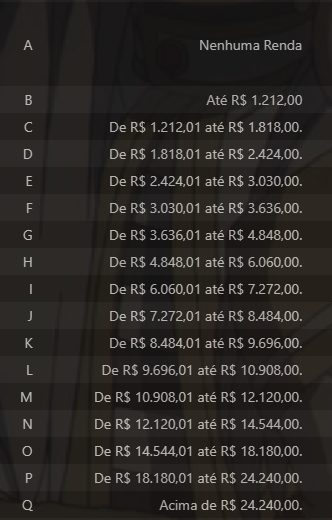

In [48]:
dict_renda = {}

for pos, value in enumerate(['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']):
    dict_renda[value] = pos
    
dict_renda

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [49]:
# Reconhecendo a ordem dos valores
df_enem['Q006'].value_counts(normalize=True)

Q006
B   0.29
C   0.17
D   0.12
E   0.08
A   0.06
G   0.06
H   0.05
F   0.05
I   0.02
J   0.02
L   0.01
Q   0.01
M   0.01
O   0.01
K   0.01
P   0.01
N   0.01
Name: proportion, dtype: float64

In [50]:
# Substituindo as Letras por Números:
df_enem['renda_familiar'] = df_enem['Q006'].map(dict_renda) # substituindo valores que são comuns em ambos

df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pais_nivel_sup,maes_nivel_sup,renda_familiar
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False,False,1
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False,False,16
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False,True,1
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False,False,0
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False,False,1


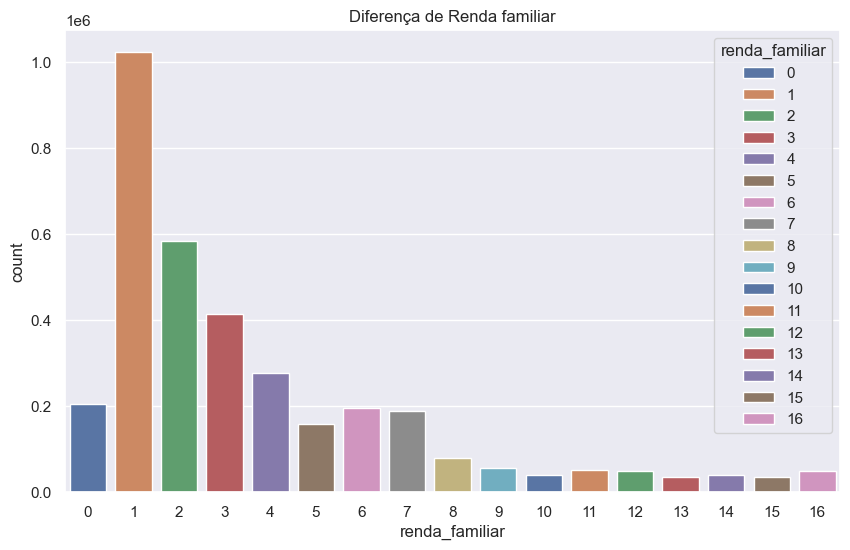

In [51]:
# Tornando mais clara os dados mostrados

# Regulando o tamanho da imagem
sns.set(rc={'figure.figsize': (10, 6)})

# Plotando o gráfico
sns.countplot(data= df_enem, x= 'renda_familiar', hue= 'renda_familiar', palette= 'deep').set_title('Diferença de Renda familiar')

plt.show()

### <span style='color:#40E0D0'> Relacionar as Notas com as características dos candidatos:

As notas vão variar com relação a:

- sexo
- raça
- instrução mãe e pai
- renda mensal da família

#### <span style='color:red'> Sexo: </span>

In [52]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pais_nivel_sup,maes_nivel_sup,renda_familiar
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False,False,1
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False,False,16
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False,True,1
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False,False,0
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False,False,1


In [53]:
# DataFrame somente com notas e sexos
df_notas_sexos = df_enem.loc[:, colunas_notas + ['TP_SEXO']]

df_notas_sexos.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,M
1,NaN,NaN,NaN,NaN,NaN,M
2,421.10,546.00,498.80,565.30,760.00,F
3,490.70,388.60,357.80,416.00,320.00,M
4,NaN,NaN,NaN,NaN,NaN,M


In [54]:
coluna_1 = df_notas_sexos.iloc[2]

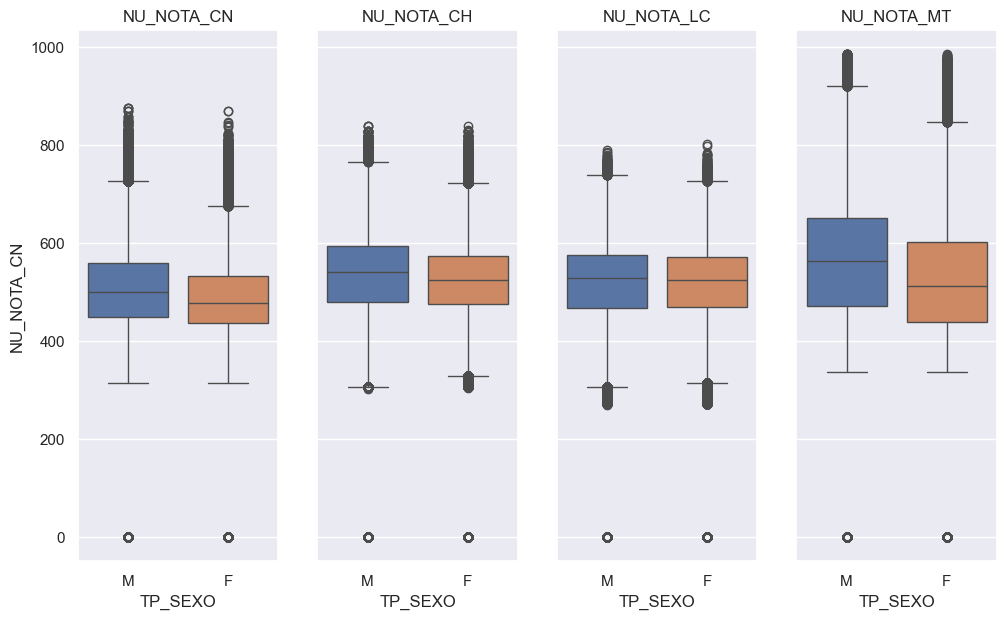

In [55]:
# Analisando notas por sexo:
fig, axes = plt.subplots(1, 4, sharey= True, figsize= (10, 6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i] # Utilizaremos a lista para o manejo
    sns.boxplot(data=df_notas_sexos, y= coluna_1, x= 'TP_SEXO', ax=axes[i], hue= 'TP_SEXO', palette= 'deep')
    axes[i].set_title(coluna_1)

plt.show()

Não podemos inferir alguma causalidade. Nosso propósito é a análise exploratória dos dados. Dessa forma, podemos visualizar que não há uma diferença significativa entre as notas enquanto ao sexo.

<br>
Único ponto de tomar-se nota é o ligeiro aumento de notas para o sexo masculino nas notas de matemática.

#### <span style='color:red'> Raça: </span>

Explicação cor e raça:

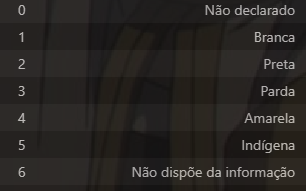

In [56]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pais_nivel_sup,maes_nivel_sup,renda_familiar
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False,False,1
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False,False,16
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False,True,1
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False,False,0
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False,False,1


In [57]:
# Juntando Notas + Raça
df_raca = df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]

df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,2
1,NaN,NaN,NaN,NaN,NaN,1
2,421.10,546.00,498.80,565.30,760.00,2
3,490.70,388.60,357.80,416.00,320.00,3
4,NaN,NaN,NaN,NaN,NaN,3


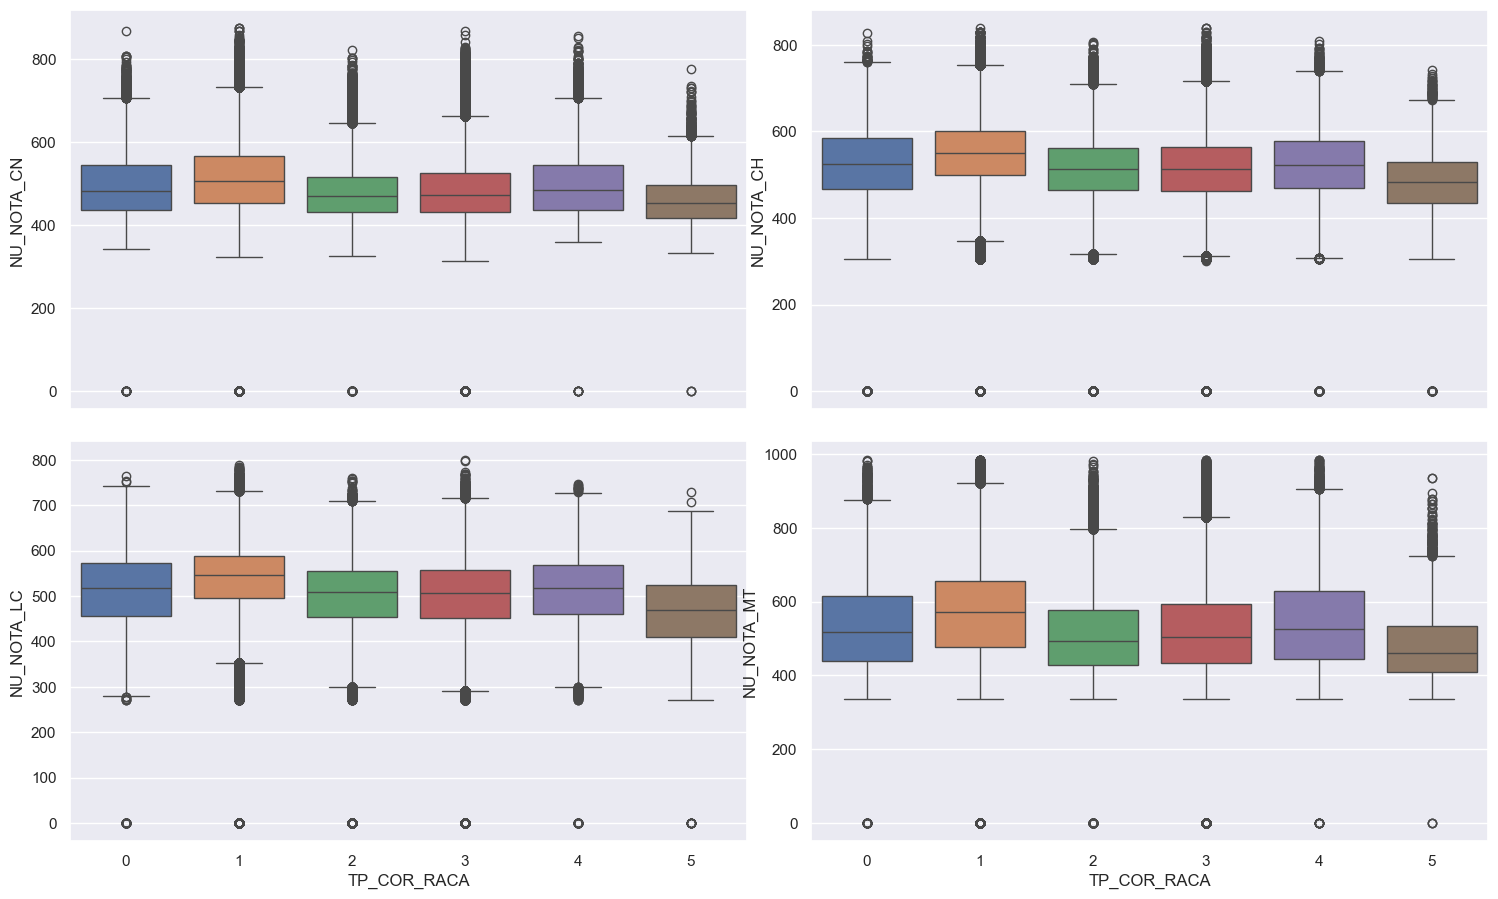

In [58]:
# Analisando nota enquanto cor_raça
fig, axes = plt.subplots(2, 2, sharex= True, figsize=(15, 9))
plt.tight_layout()

for i in range(2):
    col1 = colunas_notas[i*2]
    col2 = colunas_notas[i*2 + 1]
    sns.boxplot(data= df_raca, x= 'TP_COR_RACA', y= col1, ax=axes[i, 0], hue= 'TP_COR_RACA', legend= False, palette= 'deep')
    
    sns.boxplot(data= df_raca, x= 'TP_COR_RACA', y= col2, ax= axes[i, 1],hue= 'TP_COR_RACA', legend= False, palette= 'deep')
    
    
plt.show()

Podemos visualizar, de uma forma geral, os indígenas apresentando notas ligeiramente mais baixas 

#### <span style='color:red'> Instrução Mãe e Pai: </span>

In [59]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pais_nivel_sup,maes_nivel_sup,renda_familiar
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False,False,1
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False,False,16
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False,True,1
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False,False,0
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False,False,1


In [60]:
# Criando df de notas e com pais e mães nivel superior
df_instrucao_pais = df_enem.loc[:, colunas_notas + ['pais_nivel_sup', 'maes_nivel_sup']]

df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,pais_nivel_sup,maes_nivel_sup
0,NaN,NaN,NaN,NaN,NaN,False,False
1,NaN,NaN,NaN,NaN,NaN,False,False
2,421.10,546.00,498.80,565.30,760.00,False,True
3,490.70,388.60,357.80,416.00,320.00,False,False
4,NaN,NaN,NaN,NaN,NaN,False,False


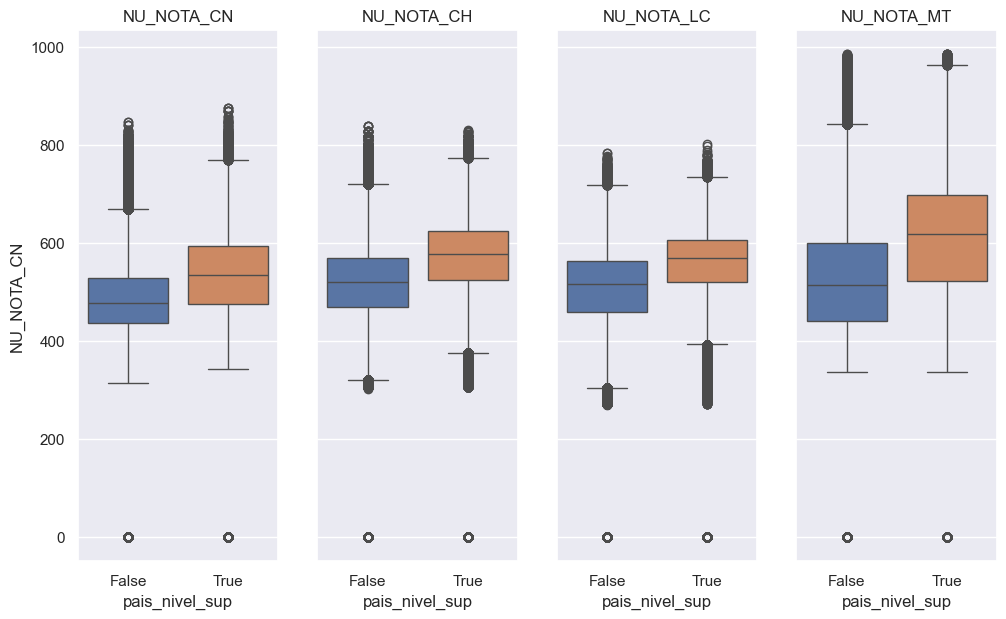

In [61]:
# Plotando gráfico nível superior pais

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(10, 6))
plt.tight_layout()

for i in range(4):
    col1 = colunas_notas[i]
    sns.boxplot(data= df_instrucao_pais, x= 'pais_nivel_sup', y= col1, ax= axes[i], 
                hue= 'pais_nivel_sup', palette='deep', legend= False)
    axes[i].set_title(col1)

plt.show()

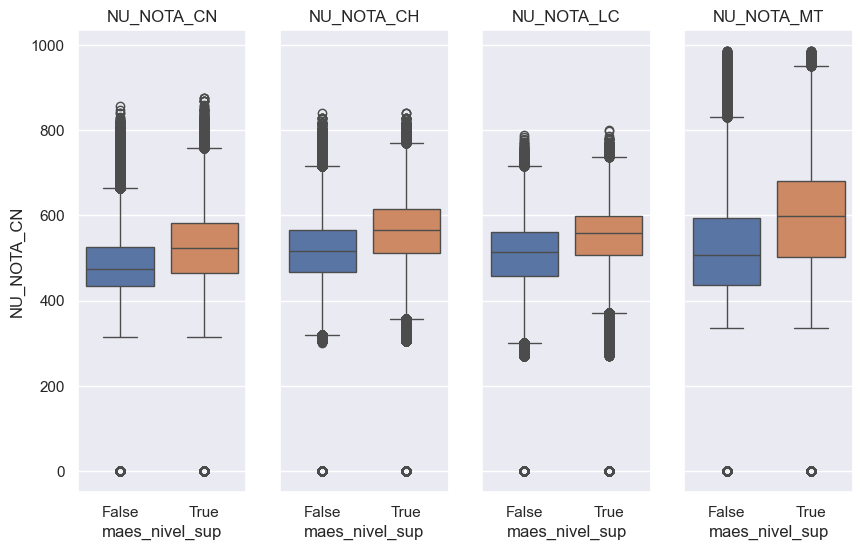

In [62]:
# Plotando nível superior mães
fig, axes= plt.subplots(1, 4, sharey= True, figsize=(10, 6))

for i in range(4):
    sns.boxplot(data= df_instrucao_pais, x= 'maes_nivel_sup', y= colunas_notas[i], ax= axes[i],
                hue= 'maes_nivel_sup', palette= 'deep', legend= False)
    axes[i].set_title(colunas_notas[i])
    
plt.show()

É visto que candidatos que apresentam pai ou mãe com nível superior apresentaram, de maneira geral, notas maiores. Notório principalmente na prova de matemática.

#### <span style='color:red'> Idade: </span>

In [63]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pais_nivel_sup,maes_nivel_sup,renda_familiar
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False,False,1
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False,False,16
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False,True,1
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False,False,0
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False,False,1


In [64]:
df_nota_por_idade = df_enem.loc[:, colunas_notas + ['TP_FAIXA_ETARIA']]

df_nota_por_idade.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA
0,NaN,NaN,NaN,NaN,NaN,14
1,NaN,NaN,NaN,NaN,NaN,14
2,421.10,546.00,498.80,565.30,760.00,5
3,490.70,388.60,357.80,416.00,320.00,6
4,NaN,NaN,NaN,NaN,NaN,4


In [65]:
# Verificar se há correlação com notas e idades ~ heatmap para correlações ~
corr_idade = df_nota_por_idade.corr()
corr_idade

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA
NU_NOTA_CN,1.00,0.60,0.57,0.60,0.43,0.02
NU_NOTA_CH,0.60,1.00,0.73,0.62,0.50,0.01
NU_NOTA_LC,0.57,0.73,1.00,0.59,0.50,-0.03
NU_NOTA_MT,0.60,0.62,0.59,1.00,0.48,-0.06
NU_NOTA_REDACAO,0.43,0.50,0.50,0.48,1.00,-0.14
TP_FAIXA_ETARIA,0.02,0.01,-0.03,-0.06,-0.14,1.00


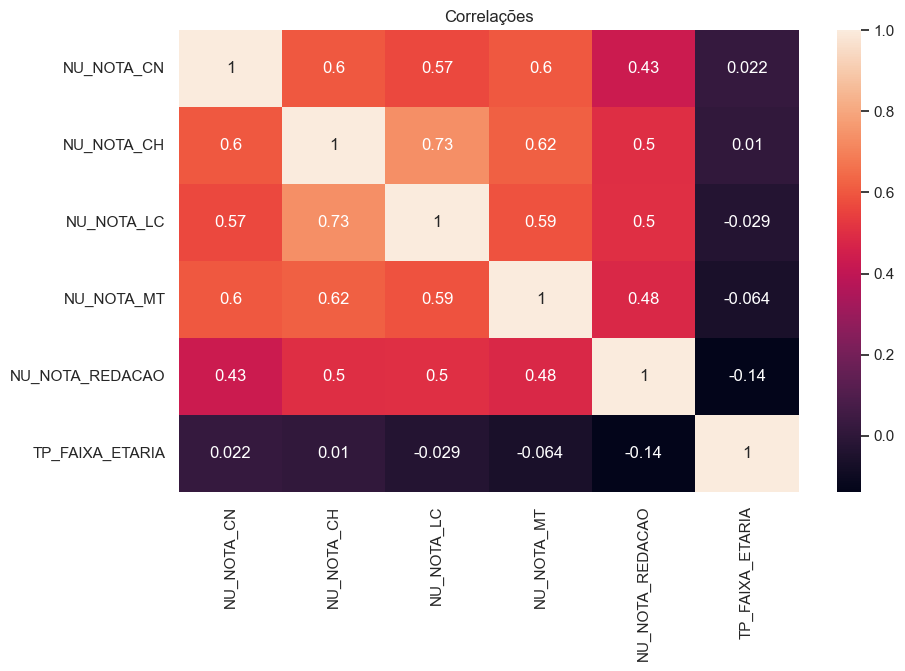

In [66]:
# Plotando essas correlações:
sns.heatmap(corr_idade, annot= True).set_title('Correlações')
plt.show()

Podemos visualizar que não há uma grande correlação da idade com a nota.

#### <span style='color:red'> Renda: </span>

In [67]:
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pais_nivel_sup,maes_nivel_sup,renda_familiar
0,14,M,2,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False,False,1
1,14,M,2,1,1,1,16,1,NaN,0,None,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False,False,16
2,5,F,1,2,1,1,2,1,NaN,0,None,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False,True,1
3,6,M,1,3,1,1,2,1,NaN,0,None,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False,False,0
4,4,M,0,3,1,1,1,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False,False,1


In [68]:
df_renda = df_enem.loc[:, colunas_notas + ['renda_familiar']]

df_renda.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,renda_familiar
0,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,16
2,421.10,546.00,498.80,565.30,760.00,1
3,490.70,388.60,357.80,416.00,320.00,0
4,NaN,NaN,NaN,NaN,NaN,1


In [69]:
df_renda.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,renda_familiar
NU_NOTA_CN,1.00,0.60,0.57,0.60,0.43,0.38
NU_NOTA_CH,0.60,1.00,0.73,0.62,0.50,0.36
NU_NOTA_LC,0.57,0.73,1.00,0.59,0.50,0.37
NU_NOTA_MT,0.60,0.62,0.59,1.00,0.48,0.43
NU_NOTA_REDACAO,0.43,0.50,0.50,0.48,1.00,0.30
renda_familiar,0.38,0.36,0.37,0.43,0.30,1.00


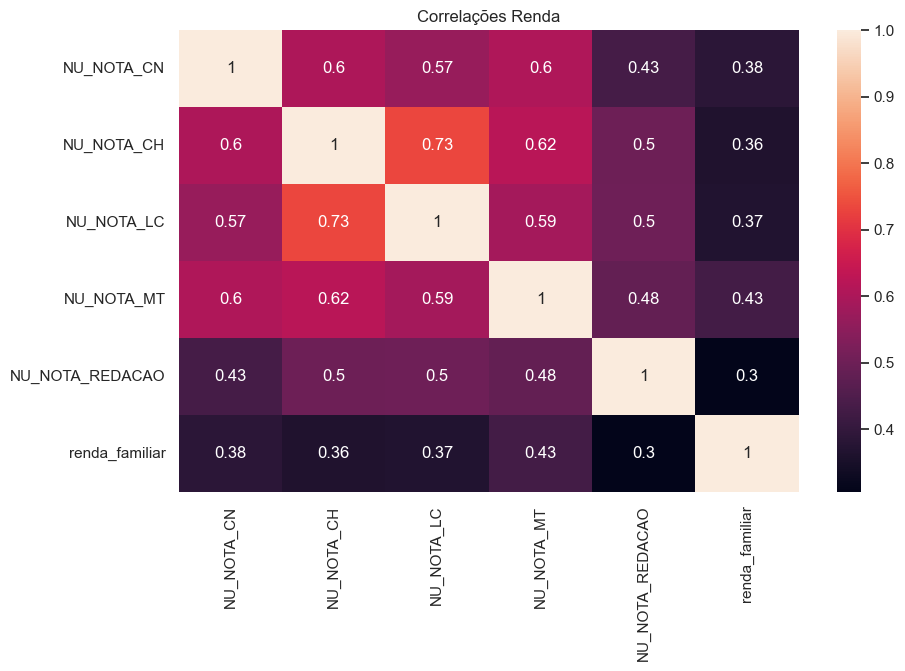

In [70]:
# Plotando heatmap

sns.heatmap(df_renda.corr(), annot= True).set_title('Correlações Renda')

plt.show()

Uma correlação entre 0.3 a 0.5 nos mostra uma correlação tida como fraca. Há relação mais forte, dentre essas, envolvendo renda familiar foi na nota de matemática.

<hr>

### <span style='color:#40E0D0'> Conclusões:

Com base na análise exploratória de dados do ENEM 2022, observamos diversas nuances que podem influenciar o desempenho dos candidatos.

- <span style='color:#40E0D0'> Em relação ao sexo: </span>
não foi identificado diferenças significativas nas notas, sugerindo que o exame é equitativo em termos de gênero. 

- <span style='color:#40E0D0'> Ao analisarmos a variável raça: </span> notamos que candidatos autodeclarados indígenas apresentaram, de forma geral, um menor desempenho em comparação com outros grupos étnicos.

- <span style='color:#40E0D0'> Escolaridade dos pais: </span> também se mostrou relevante, indicando que estudantes cujos pais possuem ao menos uma graduação completa tendem a obter melhores notas, especialmente em disciplinas como Matemática. Esse padrão ressalta a importância da educação familiar no desempenho acadêmico.

- <span style='color:#40E0D0'> Ao considerar a faixa etária: </span>não encontramos correlações significativas com as notas, indicando que o desempenho não é fortemente influenciado pela idade dos candidatos.

- <span style='color:#40E0D0'> A renda familiar: </span> apresentou uma correlação fraca, mas notável, com destaque para a disciplina de Matemática. Isso sugere que, embora a renda não seja o fator determinante, ela pode exercer algum impacto no desempenho, especialmente em áreas mais quantitativas.

Ao final da análise, podemos retratar o <span style='color:#40E0D0'> perfil mais comum entre os candidatos </span> como sendo do sexo feminino, pardo, solteiro, com 18 anos, cujos pais não possuem formação superior completa, e com uma renda familiar de até R$ 1.212,00. Essa caracterização proporciona uma compreensão socioeconômica abrangente do candidato típico no ENEM 2022, destacando áreas de desafio que podem ser abordadas para promover maior equidade e acessibilidade educacional. 
